<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/Anagha_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship : **Customer Purchase Behavior Analysis and Loyalty Prediction**
     

## **Objective:**

Given a dataset containing customer purchase history, satisfaction scores, and loyalty scores, the objective is to develop a predictive model to accurately forecast future customer satisfaction or loyalty levels.

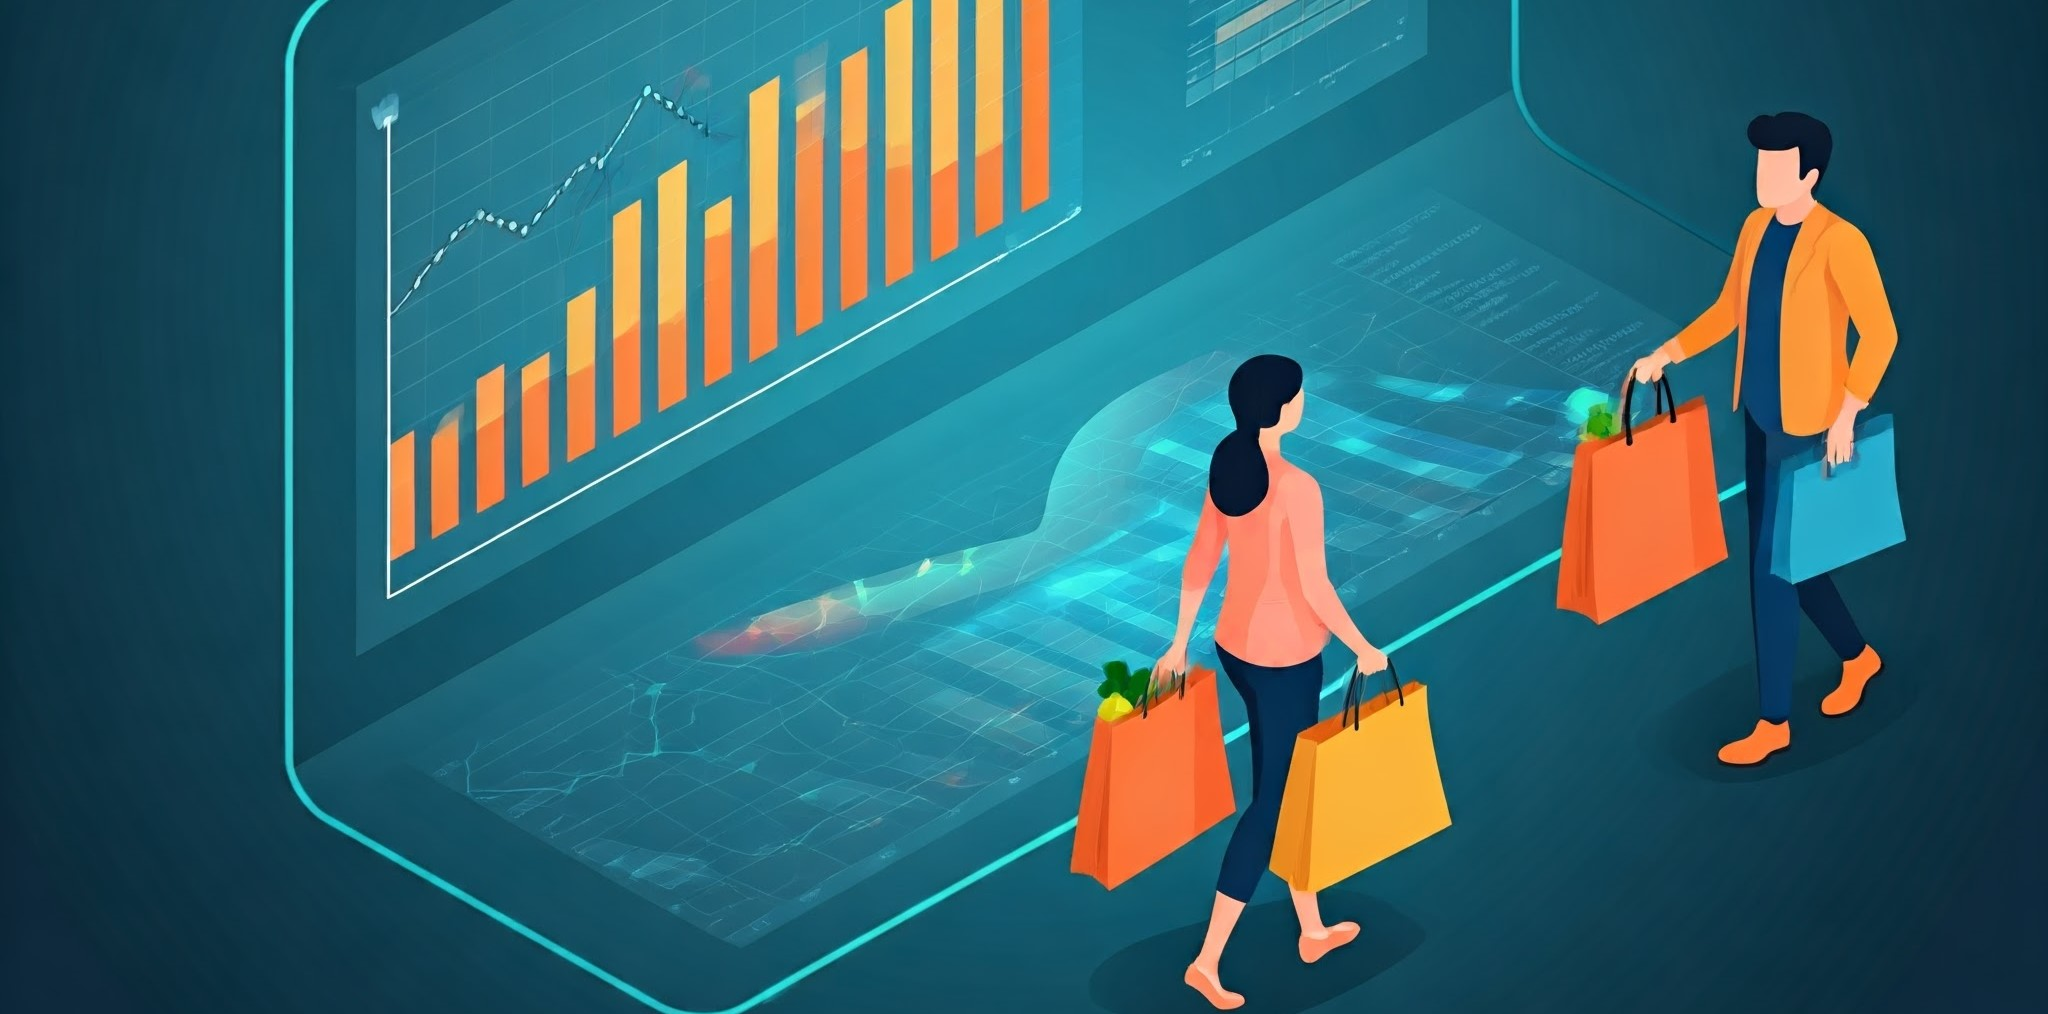

# **Dataset Description:**

 The dataset includes fields such as:

 ● **Age**: Age of the customer

 ● **ItemsPurchased**: Number of items purchased in a single transaction

 ● **Total Spen**t: Total amount spent on the transaction

 ● **Discount(%)**: Percentage discount on the purchase

 ● **Satisfaction Score**: Self-reported customer satisfaction score

 ● **Warranty Extension**: Whether the customer opted for warranty extension

 ● **Gender**: Gender of the customer

 ● **Region**: Customer's region

 ● **Product Category**: Category of the purchased product

 ● **Payment Method**: Payment method used(e.g.,UPI,Cash)

 ● **Revenue**: Total revenue from the customer

 ● **Store Rating**: Rating given by the customer to the store

 ● **Loyalty Score**: Customer's loyalty score

 ● **Membership Status**: Whether the customer is a member

 ● **Preferred Visit Time**: Preferred time of visit


# **Week 1. Data Understanding, Cleaning and Exploratory Data Analysis**

##**1. Data Loading**

In [1]:
# Importing LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOADING THE DATASET

df= pd.read_csv('/content/Electronic.csv')

In [3]:
# Displays first 5 rows
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


## **2. Understanding the Data**

In [4]:
# CHECK FOR MISSING VALUES

df.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


Features with misssing values and their respective counts are :


*   Gender	             2
*   Payment Method    	 4
*   Store Rating	       3
*   Membership Status	   6
*   Preferred Visit Time 8




In [5]:
# check for duplicate data
df.duplicated().sum()

0

In [6]:
# Print suummary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

* 5000 rows
* 15 columns





In [7]:
# Understands the data types

df.dtypes

,0
Age,int64
Items Purchased,int64
Total Spent,float64
Discount (%),float64
Satisfaction Score,float64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object


        dtypes:
* float64(7)
* int64(3)
* object(5)

## **3. Data Cleaning**

### Missing value handling: Mode/ median imputation

In [8]:
# Handling missing values
# mode imputation for categorical features

for col in ['Gender', 'Payment Method', 'Membership Status', 'Preferred Visit Time']:

   df[col] = df[col].fillna(df[col].mode()[0])

# median imputation

df['Store Rating'] = df['Store Rating'].fillna(df['Store Rating'].median())

df.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


### Outlier Treatment: IQR function

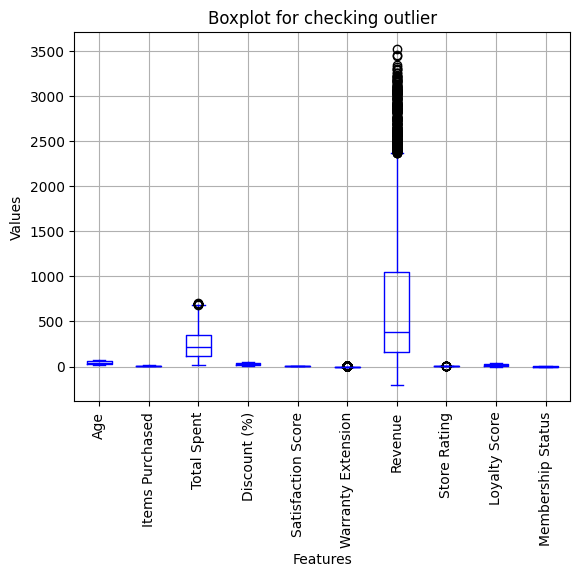

In [9]:
# Outlier checking using boxplot

df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [10]:
df.skew(numeric_only=True)

,0
Age,-0.012230
Items Purchased,-0.018387
Total Spent,0.597528
Discount (%),-0.179842
Satisfaction Score,0.351392
Warranty Extension,1.349447
Revenue,1.394284
Store Rating,0.062108
Loyalty Score,0.330271
Membership Status,0.832019


In [11]:
# Outlier treatment in  revenue and total spent using iqr function

def treat_outliers_iqr(df, column):


  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df


# Treat outliers in 'Revenue' and 'Total Spent'
df = treat_outliers_iqr(df, 'Revenue')
df = treat_outliers_iqr(df, 'Total Spent')

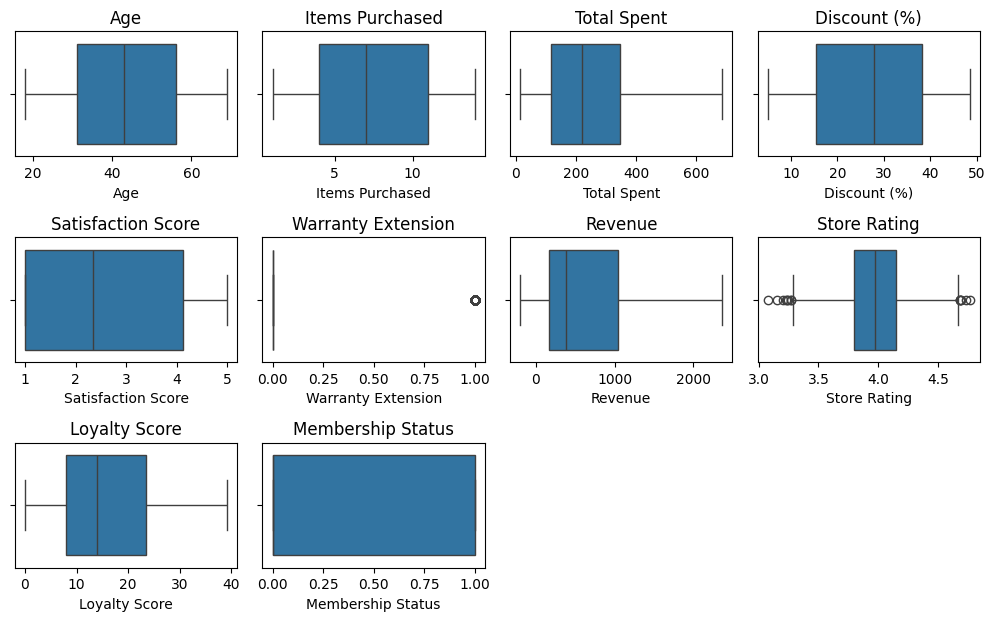

In [12]:
# boxplot after outlier treatment
numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

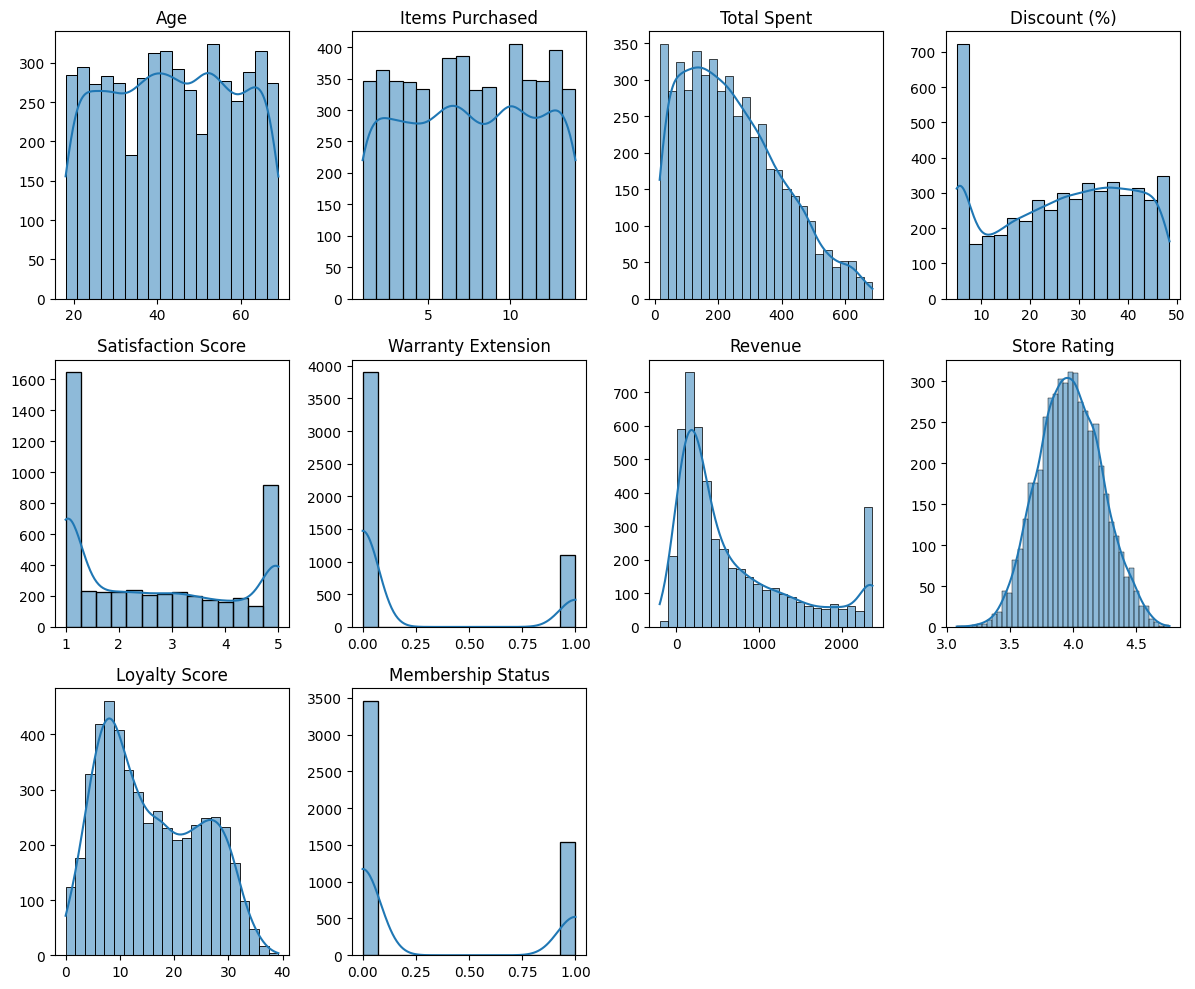

In [13]:
# hist plot of variables to check for change in symmetry after outlier treatment

numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

## **4. Exploratory DataAnalysis (EDA):**

## **Univariate Analysis**

In [15]:
# numeriacal columns and categorical columns

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
categorical_cols

Numerical Columns:
['Age', 'Items Purchased', 'Total Spent', 'Discount (%)', 'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating', 'Loyalty Score', 'Membership Status']

Categorical Columns:


['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time']

### **4.1 Univariate analysis of Age**




count    5000.000000
mean       43.584600
std        14.919094
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64
Skewness of Age: -0.012230366929141884


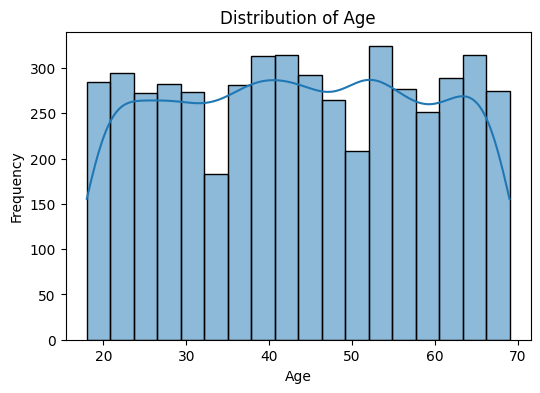

In [18]:
# Descriptive statistics
print(df['Age'].describe())

# Skewness
skewness_age = df['Age'].skew()
print(f"Skewness of Age: {skewness_age}")

# Histogram and KDE plot
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Key points:**

* Age range: It seems like most people are between 30 and 50.

* Shape: The distribution is roughly bell-shaped, meaning there's a peak around the middle ages and it tapers off towards the extremes.

* Skewness: It's slightly skewed to the right, meaning there are a few older people compared to younger ones.

### **4.2 Univariate Analysis of Items Purchased**

count    5000.000000
mean        7.536600
std         4.014858
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: Items Purchased, dtype: float64
Skewness of Items Purchased: -0.018387067084722975


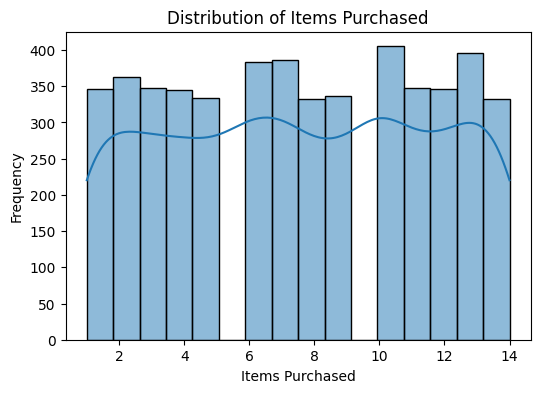

In [19]:
# Descriptive statistics
print(df['Items Purchased'].describe())

# Skewness
skewness_items_purchased = df['Items Purchased'].skew()
print(f"Skewness of Items Purchased: {skewness_items_purchased}")

# Histogram and KDE plot
plt.figure(figsize=(6, 4))
sns.histplot(df['Items Purchased'], kde=True)
plt.title('Distribution of Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Frequency')
plt.show()


**Interpretation**

The distribution is approximately normal, with a slight negative skew. Most customers purchase around 7-8 items.

Overall, most customers purchase a moderate number of items, with some outliers on both ends.

**Key Observations**

* Central Tendency: The mean and median are close, indicating a symmetrical distribution.
* Spread: The standard deviation shows a moderate spread.
* Shape: The histogram shows a clear peak between 7 and 8 items.


### **4.3 univariate analysis of total spent**

count    5000.000000
mean      243.707342
std       154.907175
min        15.105730
25%       119.130074
50%       221.514206
75%       346.173367
max       686.738308
Name: Total Spent, dtype: float64
Skewness of Total Spent: 0.5959533439589859


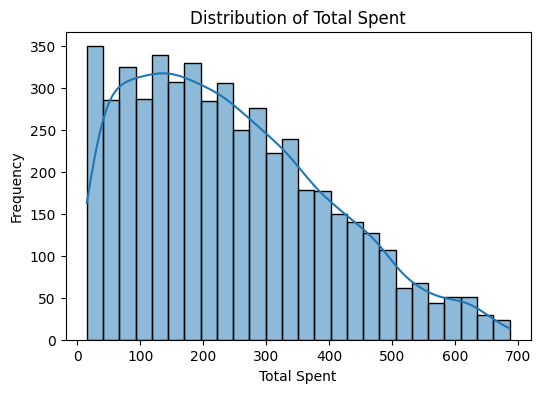

In [20]:
# Descriptive statistics for 'Total Spent'
print(df['Total Spent'].describe())

# Skewness of 'Total Spent'
skewness_total_spent = df['Total Spent'].skew()
print(f"Skewness of Total Spent: {skewness_total_spent}")

# Histogram and KDE plot for 'Total Spent'
plt.figure(figsize=(6, 4))
sns.histplot(df['Total Spent'], kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()


**Interpretation**

The distribution of total spending exhibits a right-skewed pattern, indicating that a majority of customers tend to spend less than the average amount. This is evident from the longer tail extending towards higher spending values.

**Key Observations:**

* Central Tendency: The mean (243.71) and median (221.51) values suggest that the average spending is around this range.
* Spread: The standard deviation (154.91) indicates a moderate spread in spending amounts.
* Skewness: The positive skewness (0.59) confirms the right-skewed nature of the distribution.

### **4.4 Univariate analysis of discount**

count    5000.000000
mean       26.622330
std        13.586725
min         5.000000
25%        15.382663
50%        27.848579
75%        38.086993
max        48.489427
Name: Discount (%), dtype: float64
Skewness of Discount: -0.17984239343164707


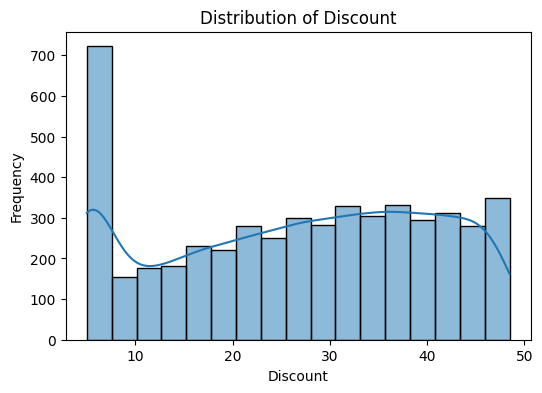

In [21]:
# Descriptive statistics for 'Discount'
print(df['Discount (%)'].describe())

# Skewness of 'Discount'
skewness_discount = df['Discount (%)'].skew()
print(f"Skewness of Discount: {skewness_discount}")

# Histogram and KDE plot for 'Discount'
plt.figure(figsize=(6, 4))
sns.histplot(df['Discount (%)'], kde=True)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


**Key Observations:**

* Distribution: The discount distribution appears to be moderately right-skewed, with a majority of discounts falling between 20% and 35%.
* Central Tendency: The mean discount is 26.62%, while the median discount is 27.85%.
* Spread: Discounts range from a minimum of 5% to a maximum of 48.49%, with a standard deviation of 13.59%.

### **4.5 Univariate analysis of Satisfaction Score**

count    5000.000000
mean        2.650108
std         1.533394
min         1.000000
25%         1.000000
50%         2.338884
75%         4.129317
max         5.000000
Name: Satisfaction Score, dtype: float64
Skewness of Satisfaction Score: 0.35139241215188743


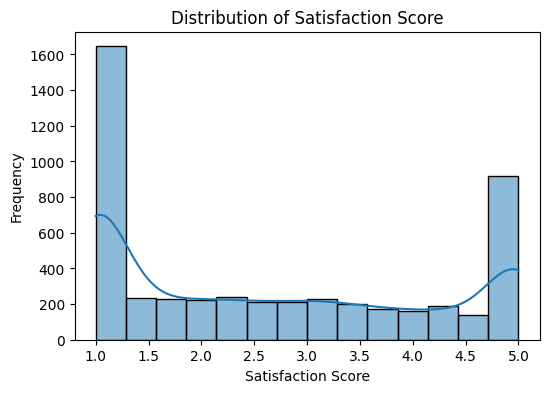

In [22]:
# Descriptive statistics for 'Satisfaction Score'
print(df['Satisfaction Score'].describe())

# Skewness of 'Satisfaction Score'
skewness_satisfaction_score = df['Satisfaction Score'].skew()
print(f"Skewness of Satisfaction Score: {skewness_satisfaction_score}")

# Histogram and KDE plot for 'Satisfaction Score'
plt.figure(figsize=(6, 4))
sns.histplot(df['Satisfaction Score'], kde=True)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

This distribution suggests that while there are a significant number of customers with lower satisfaction scores, there is also a considerable portion of customers who are highly satisfied with the product or service.

**Key Observations:**

* Mean: The average satisfaction score is 2.65, indicating a moderate level of satisfaction overall.
* Standard Deviation: The scores are spread out by an average of 1.53 units from the mean.
* Range: The scores range from 1 (lowest) to 5 (highest).
* Skewness: The skewness of 0.35 indicates a moderate positive skew, as mentioned earlier.


### **4.6 univariate analysis of Warranty Extension**

count    5000.000000
mean        0.220400
std         0.414558
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Warranty Extension, dtype: float64
Skewness of Warranty Extension: 1.349446810515997


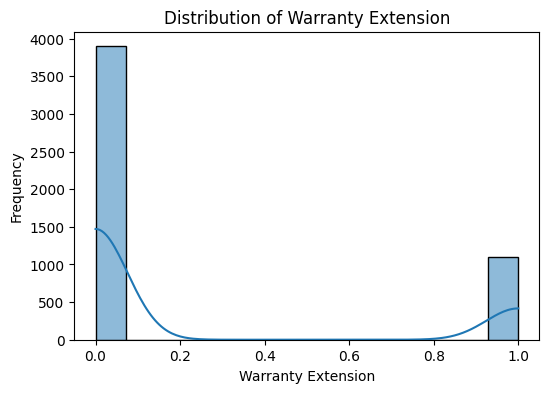

In [23]:
# prompt:   with skewness, describe Warranty Extension

# Descriptive statistics for 'Warranty Extension'
print(df['Warranty Extension'].describe())

# Skewness of 'Warranty Extension'
skewness_warranty_extension = df['Warranty Extension'].skew()
print(f"Skewness of Warranty Extension: {skewness_warranty_extension}")

# Histogram and KDE plot for 'Warranty Extension'
plt.figure(figsize=(6, 4))
sns.histplot(df['Warranty Extension'], kde=True)
plt.title('Distribution of Warranty Extension')
plt.xlabel('Warranty Extension')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

The distribution of warranty extensions is positively skewed, with a long tail towards the higher end. This indicates that most customers do not purchase warranty extensions, while a smaller portion does.

**Key Observations:**

The mean warranty extension rate is 0.22, and the standard deviation is 0.41.
The skewness of 1.35 confirms the strong positive skew.

### **4.7 Univariate analysis of Revenue**

count    5000.000000
mean      695.021226
std       716.766601
min      -201.427094
25%       164.697614
50%       380.548500
75%      1047.426498
max      2371.519823
Name: Revenue, dtype: float64
Skewness of Revenue: 1.1581798217159913


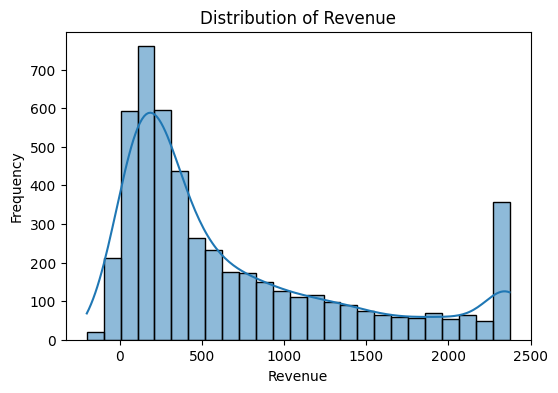

In [24]:
# Descriptive statistics for 'Revenue'
print(df['Revenue'].describe())

# Skewness of 'Revenue'
skewness_revenue = df['Revenue'].skew()
print(f"Skewness of Revenue: {skewness_revenue}")

# Histogram and KDE plot for 'Revenue'
plt.figure(figsize=(6, 4))
sns.histplot(df['Revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

This distribution suggests that a majority of the observations have lower revenue values, while a smaller portion has significantly higher revenue values. This pattern is often seen in scenarios where there are a few high-value outliers that pull the distribution to the right.

**Key Observations:**

* Mean: The average revenue is 695.02.
* Standard Deviation: The revenues are spread out by an average of 716.77 from the mean.
* Range: The revenues range from -201.43 to 2371.52.
* Skewness: The skewness of 1.16 indicates a moderate positive skew, as mentioned earlier.



### **4.8 Univariate analysis of Store Rating**

count    5000.000000
mean        3.975181
std         0.250616
min         3.076092
25%         3.799819
50%         3.969738
75%         4.149890
max         4.764298
Name: Store Rating, dtype: float64
Skewness of Store Rating: 0.0621081526060909


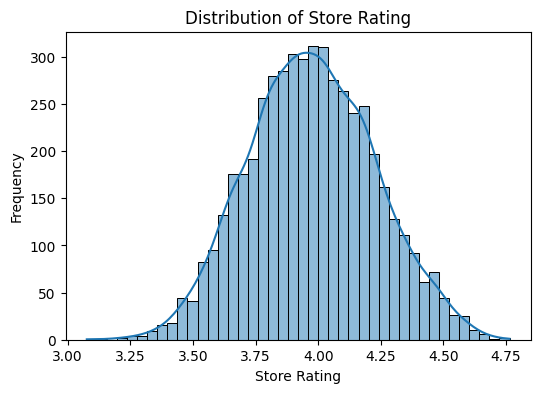

In [25]:
# Descriptive statistics for 'Store Rating'
print(df['Store Rating'].describe())

# Skewness of 'Store Rating'
skewness_store_rating = df['Store Rating'].skew()
print(f"Skewness of Store Rating: {skewness_store_rating}")

# Histogram and KDE plot for 'Store Rating'
plt.figure(figsize=(6, 4))
sns.histplot(df['Store Rating'], kde=True)
plt.title('Distribution of Store Rating')
plt.xlabel('Store Rating')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

This distribution suggests that most customers have a positive perception of the stores, with a small proportion giving slightly higher ratings. This is a good sign for the business, as it indicates overall customer satisfaction.

### **4.9 Univariate analysis of Loyalty Score**


count    5000.000000
mean       15.638275
std         9.144742
min         0.000000
25%         7.944790
50%        13.969791
75%        23.521601
max        39.235391
Name: Loyalty Score, dtype: float64
Skewness of Loyalty Score: 0.3302706815641065


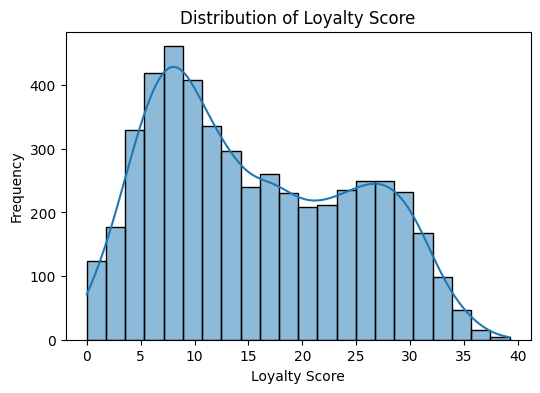

In [26]:
# Descriptive statistics for 'Loyalty Score'
print(df['Loyalty Score'].describe())

# Skewness of 'Loyalty Score'
skewness_loyalty_score = df['Loyalty Score'].skew()
print(f"Skewness of Loyalty Score: {skewness_loyalty_score}")

# Histogram and KDE plot for 'Loyalty Score'
plt.figure(figsize=(6, 4))
sns.histplot(df['Loyalty Score'], kde=True)
plt.title('Distribution of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**

This distribution suggests that a majority of the customers have lower loyalty scores, while a smaller portion has significantly higher loyalty scores. This pattern is often seen in scenarios where there are a few highly loyal customers who stand out from the rest.

**Key Observations:**

* Mean: The average loyalty score is 15.64.
* Standard Deviation: The scores are spread out by an average of 9.14 units from the mean.
* Range: The scores range from 0 to 39.24.
* Skewness: The skewness of 0.33 indicates a moderate positive skew, as mentioned earlier.

### **4.10 Univariate analysis of Membership Status**

count    5000.000000
mean        0.308000
std         0.461713
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Membership Status, dtype: float64

Frequency Distribution of Membership Status:
 Membership Status
0.0    3460
1.0    1540
Name: count, dtype: int64


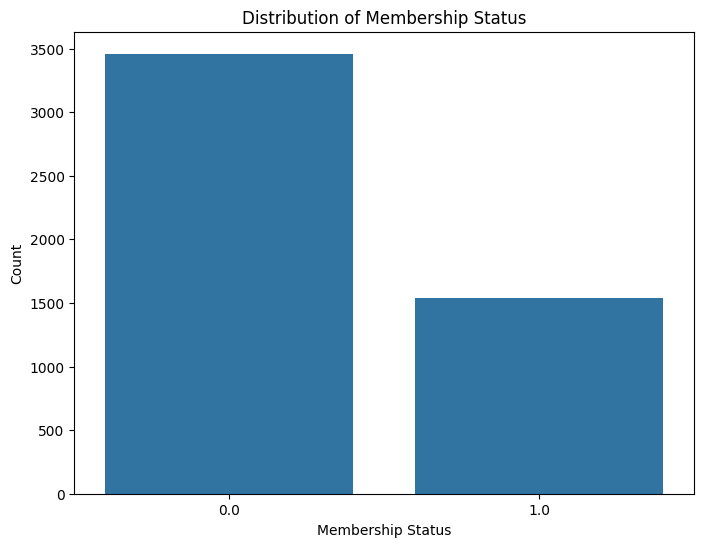

In [27]:
# Descriptive statistics for 'Membership Status'
print(df['Membership Status'].describe())

# Frequency distribution of 'Membership Status'
membership_counts = df['Membership Status'].value_counts()
print("\nFrequency Distribution of Membership Status:\n", membership_counts)

# Bar plot for 'Membership Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Membership Status', data=df)
plt.title('Distribution of Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.show()


**Interpretation:**

This distribution indicates that a majority of the individuals in the dataset are not members of the program or service represented by the "Membership Status" variable. A smaller proportion, approximately 30.8%, are active members.

### **4.11 Univariate Analysis of Gender**


Frequency Distribution of Gender:
 Gender
Male      2448
Female    2371
Other      181
Name: count, dtype: int64


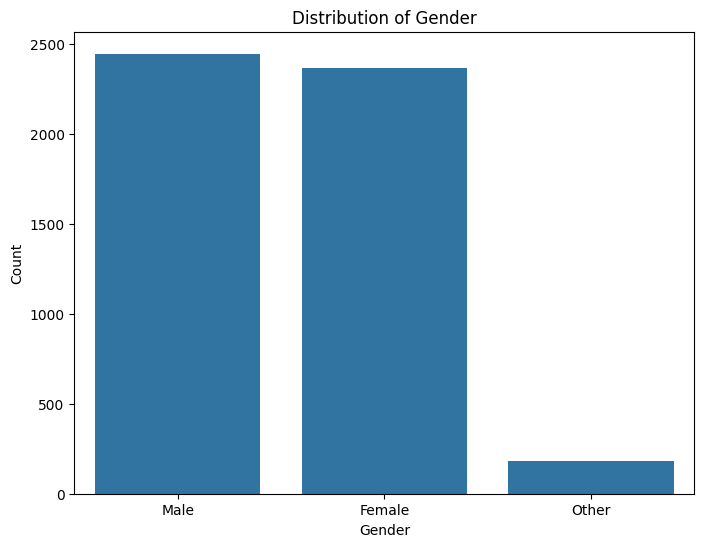

In [29]:
# Frequency distribution of 'Gender'
gender_counts = df['Gender'].value_counts()
print("\nFrequency Distribution of Gender:\n", gender_counts)

# Bar plot for 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Interpretation:**

* The dataset is dominated by males and females, with a significantly smaller number of individuals identifying as "Other."
* The distribution is relatively balanced between males and females.

### **4.12  Univariate Analysis of Region**


Frequency Distribution of Region:
 Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64


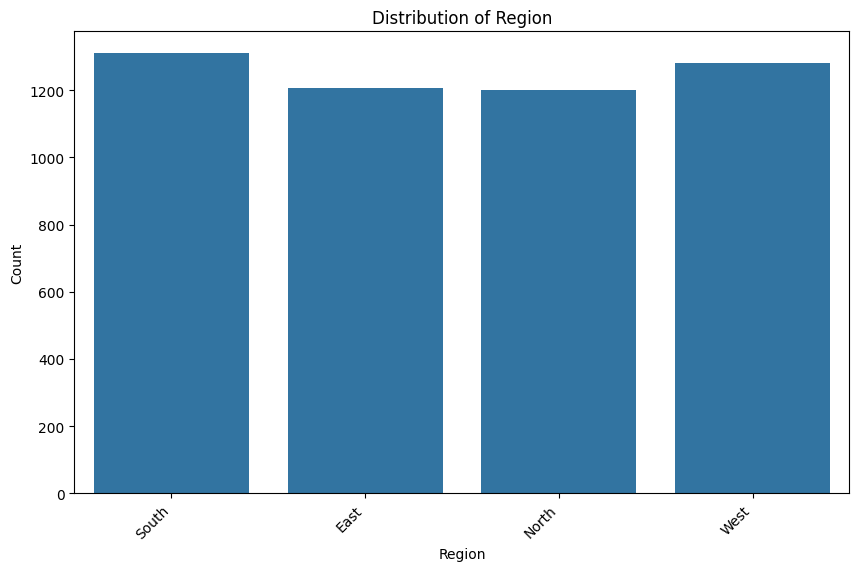

In [30]:
# Frequency distribution of 'Region'
region_counts = df['Region'].value_counts()
print("\nFrequency Distribution of Region:\n", region_counts)

# Bar plot for 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution appears to be relatively balanced across the four regions.
* Dominant Region: The South region has the highest number of observations, followed by West, East, and North.

### **4.13 Univariate Analysis of Product Category**


Frequency Distribution of Product Category:
 Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64


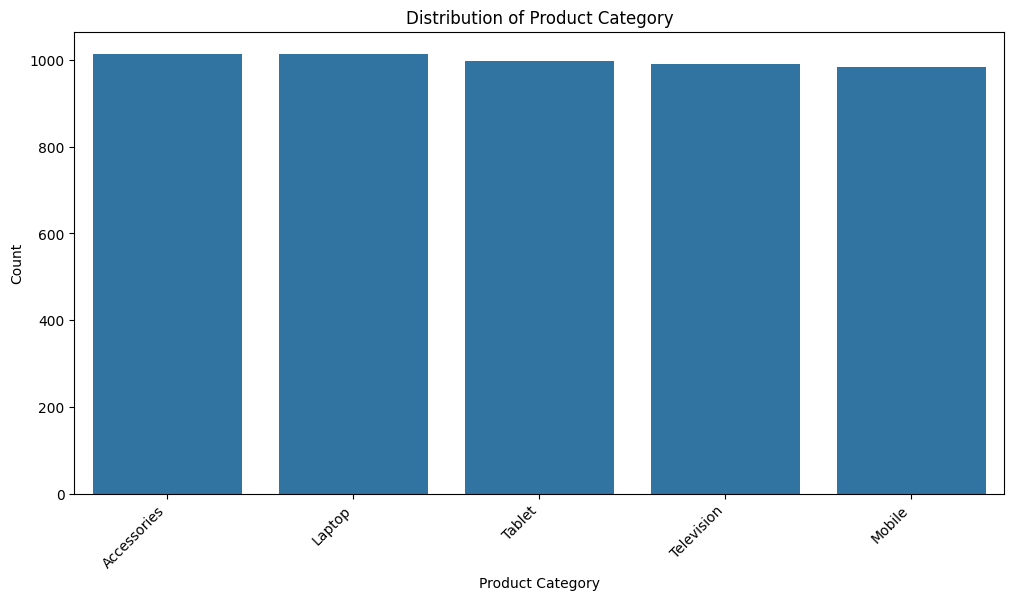

In [31]:
# Frequency distribution of 'Product Category'
product_category_counts = df['Product Category'].value_counts()
print("\nFrequency Distribution of Product Category:\n", product_category_counts)


# Bar plot for 'Product Category'
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', data=df)
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the five product categories.
* Dominant Category: Accessories and Laptops have slightly higher frequencies compared to the other categories.

### **4.14  Univariate Analysis of Payment Method**


Frequency Distribution of Payment Method:
 Payment Method
Net Banking    1042
Cash           1015
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64


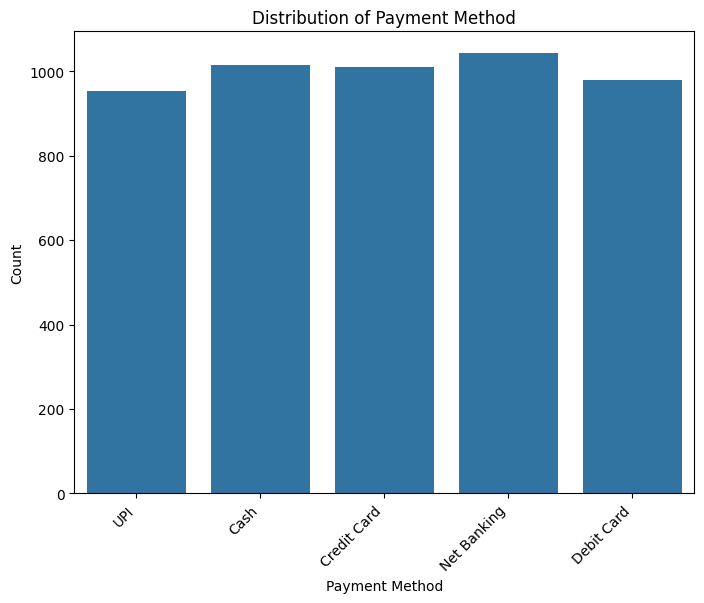

In [32]:
# Frequency distribution of 'Payment Method'
payment_method_counts = df['Payment Method'].value_counts()
print("\nFrequency Distribution of Payment Method:\n", payment_method_counts)

# Bar plot for 'Payment Method'
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the five payment methods.
* Dominant Payment Method: Net Banking is the most frequently used payment method.

### **4.15 Univariate analysis of Preferred Visit Time**


Frequency Distribution of Preferred Visit Time:
 Preferred Visit Time
Morning      1680
Evening      1660
Afternoon    1660
Name: count, dtype: int64


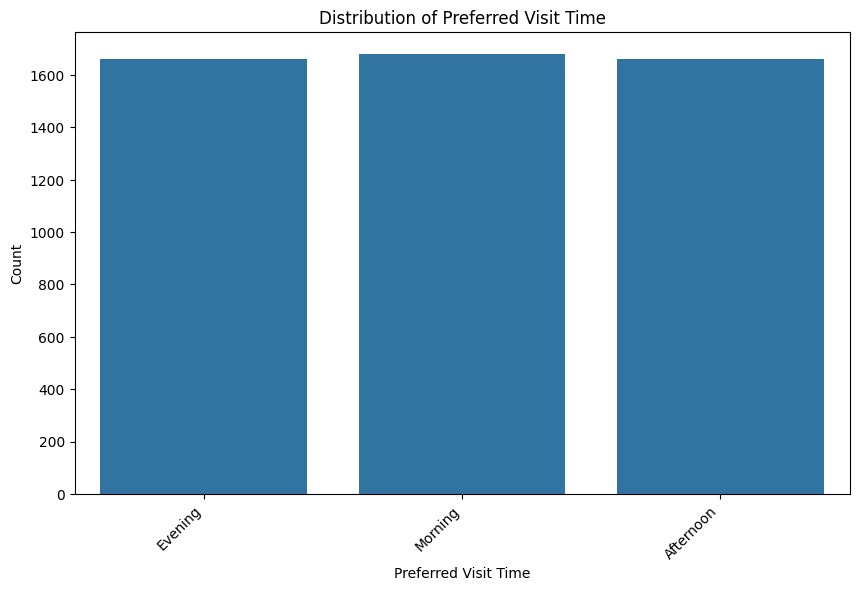

In [33]:
# Frequency distribution of 'Preferred Visit Time'
preferred_visit_time_counts = df['Preferred Visit Time'].value_counts()
print("\nFrequency Distribution of Preferred Visit Time:\n", preferred_visit_time_counts)

# Bar plot for 'Preferred Visit Time'
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', data=df)
plt.title('Distribution of Preferred Visit Time')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Interpretation:**

* Distribution: The distribution is relatively balanced across the three time slots.
* Dominant Time Slot: Morning is slightly more preferred than Evening and Afternoon.

## **Bivariate Analysis**

### **Scatter plots**

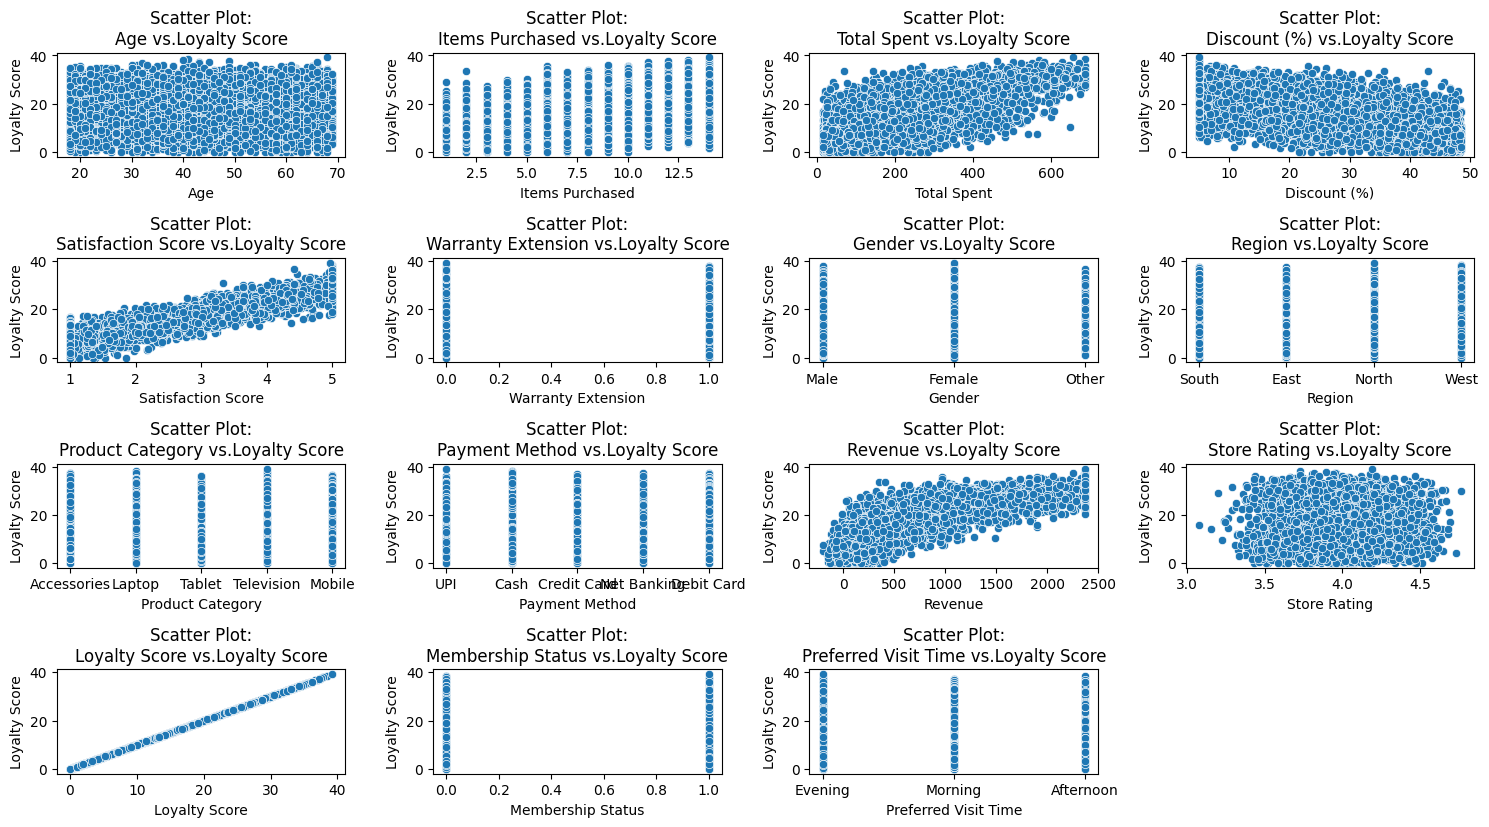

In [34]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):

    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='Loyalty Score')
    plt.title(f'Scatter Plot:\n{col} vs.Loyalty Score')
    plt.xlabel(col)
plt.tight_layout()
plt.show()
plt.show()

### **Age vs. Loyalty Score**

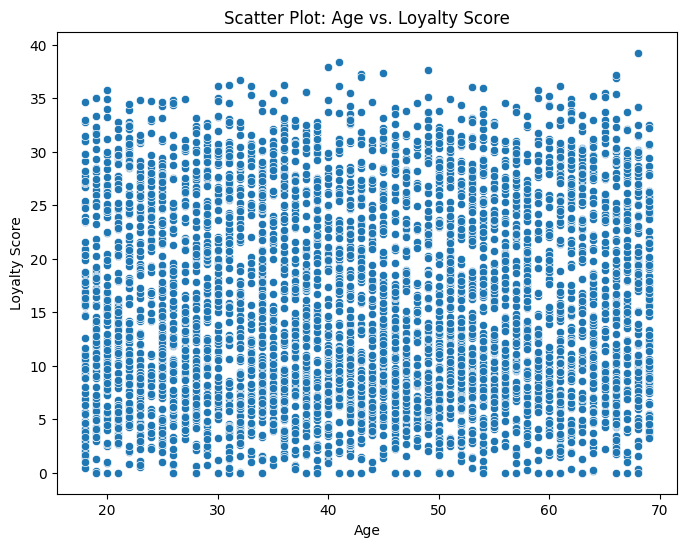

Correlation between Age and Loyalty Score: 0.009317152247672982


In [36]:
# Bivariate Analysis: Age vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Age vs. Loyalty Score')
plt.xlabel('Age')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Age and Loyalty Score
correlation = df['Age'].corr(df['Loyalty Score'])
print(f"Correlation between Age and Loyalty Score: {correlation}")

# Further analysis (e.g., regression, grouping by age ranges) can be performed to understand the relationship in more detail.

* The scatter plot shows **no clear relationship**  between Age and Loyalty Score.
* There's no distinct pattern, and loyalty scores are spread across all age groups.
* Age likely isn't a strong predictor of loyalty

### **Items Purchased vs. Loyalty Score**



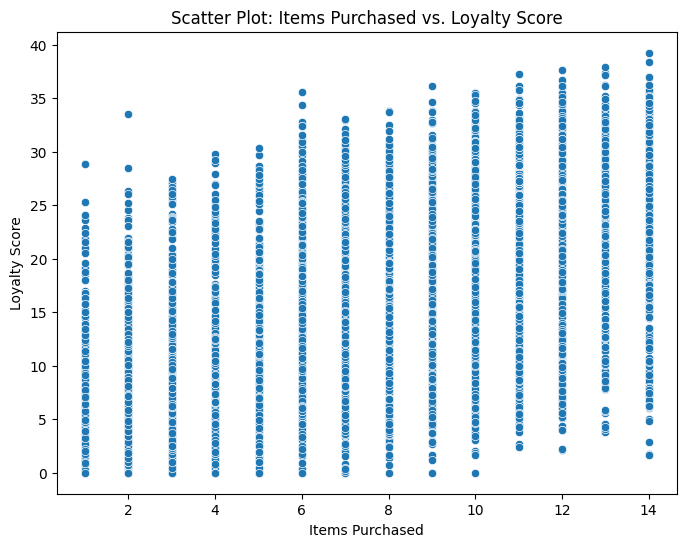

Correlation between Items Purchased and Loyalty Score: 0.5577818268360359


In [37]:
# Bivariate Analysis: Items Purchased vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Items Purchased', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Items Purchased vs. Loyalty Score')
plt.xlabel('Items Purchased')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Items Purchased and Loyalty Score
correlation = df['Items Purchased'].corr(df['Loyalty Score'])
print(f"Correlation between Items Purchased and Loyalty Score: {correlation}")

* The scatter plot shows a **weak positive correlation** between items purchased and loyalty score.
* As customers buy more, their loyalty tends to increase.
* However, the vertical clusters suggest other factors influence loyalty beyond purchase volume.

### **Total Spent vs. Loyalty Score**

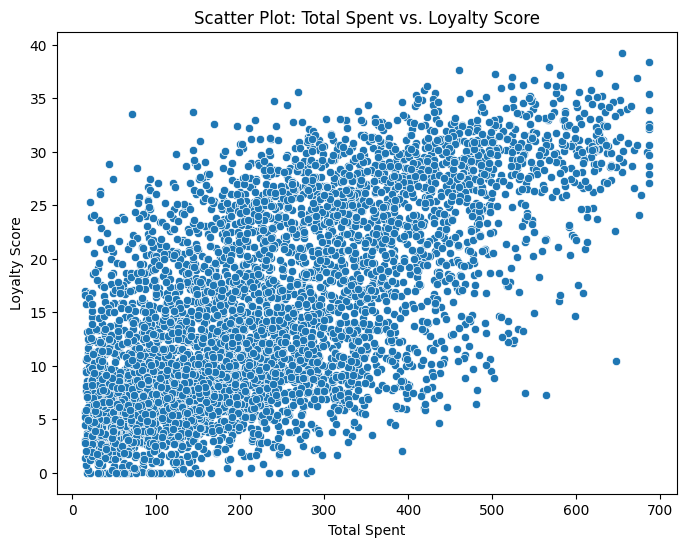

Correlation between Total Spent and Loyalty Score: 0.6697318451559876


In [38]:
# Bivariate Analysis: Total Spent vs. Loyalty ScoreTotal Spent vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Total Spent vs. Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Total Spent and Loyalty Score
correlation = df['Total Spent'].corr(df['Loyalty Score'])
print(f"Correlation between Total Spent and Loyalty Score: {correlation}")


**Interpretation:**


* The scatter plot illustrates a positive correlation
* This analysis suggests that customer spending is a significant factor influencing their loyalty.
* The business may want to focus on strategies to encourage higher spending among customers to boost their loyalty.
* It's also important to identify and reward high-spending, high-loyalty customers to retain their business.

### **Discount (%) vs. Loyalty Score**

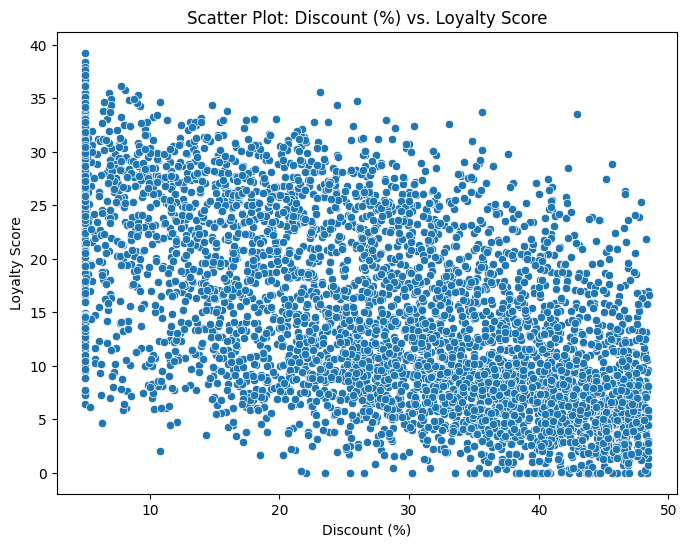

Correlation between Discount (%) and Loyalty Score: -0.6591789564199544


In [39]:
# Bivariate Analysis: Discount (%) vs. Loyalty ScoreDiscount (%) vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount (%)', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Discount (%) vs. Loyalty Score')
plt.xlabel('Discount (%)')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Discount (%) and Loyalty Score
correlation = df['Discount (%)'].corr(df['Loyalty Score'])
print(f"Correlation between Discount (%) and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **negative correlation** between "Discount (%)" and "Loyalty Score."
* Higher discounts tend to be associated with lower loyalty scores.
* Customers who are highly loyal may not need significant discounts to make purchases.

### **Satisfaction Score vs. Loyalty Score**


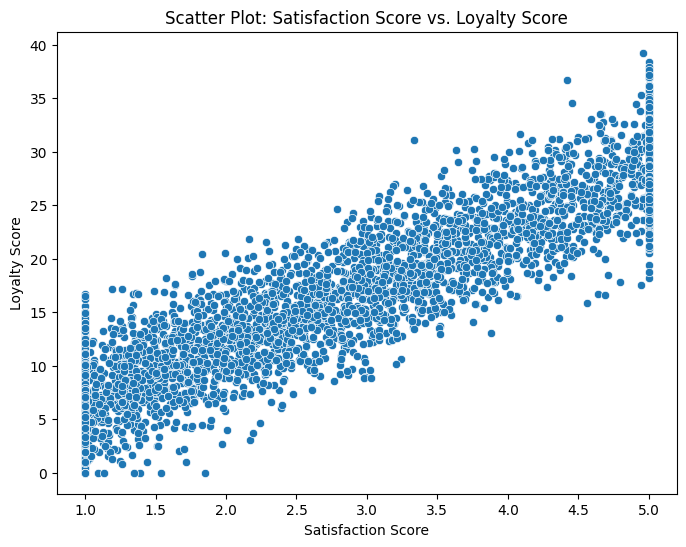

Correlation between Satisfaction Score and Loyalty Score: 0.935085773891323


In [40]:
# Bivariate Analysis: Satisfaction Score vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Satisfaction Score vs. Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Satisfaction Score and Loyalty Score
correlation = df['Satisfaction Score'].corr(df['Loyalty Score'])
print(f"Correlation between Satisfaction Score and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **strong positive correlation** between "Satisfaction Score" and "Loyalty Score."
* Customer satisfaction is a key driver of loyalty.
*  The business should prioritize strategies to improve customer satisfaction, which will likely lead to increased loyalty.

### **Warranty Extension vs. Loyalty Score**

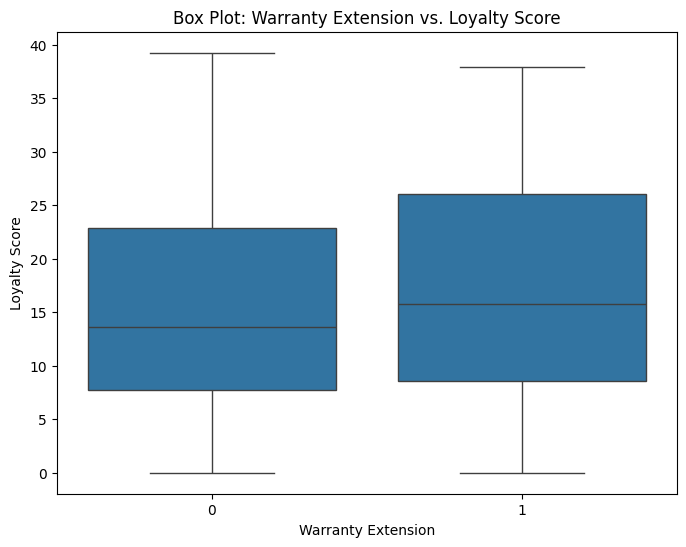

Correlation between Warranty Extension and Loyalty Score: 0.07603756184013429


In [41]:
# Bivariate Analysis: Warranty Extension vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.boxplot(x='Warranty Extension', y='Loyalty Score', data=df)
plt.title('Box Plot: Warranty Extension vs. Loyalty Score')
plt.xlabel('Warranty Extension')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Warranty Extension and Loyalty Score
correlation = df['Warranty Extension'].corr(df['Loyalty Score'])
print(f"Correlation between Warranty Extension and Loyalty Score: {correlation}")

**Interpretation:**

* While there seems to be a slight tendency for customers with warranty extensions to have higher loyalty scores, the **relationship is not strong.**
*  Other factors likely have a more significant impact on customer loyalty.

### **Revenue vs. Loyalty Score**


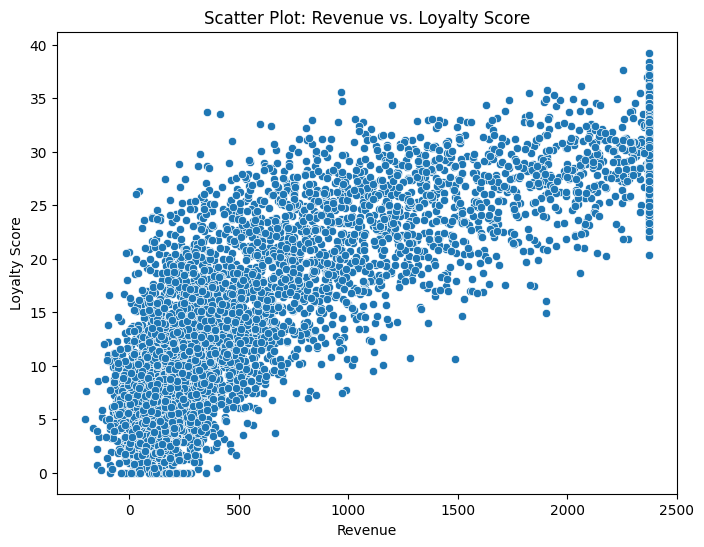

Correlation between Revenue and Loyalty Score: 0.8225122155478709


In [42]:
# Bivariate Analysis: Revenue vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenue', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Revenue vs. Loyalty Score')
plt.xlabel('Revenue')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Revenue and Loyalty Score
correlation = df['Revenue'].corr(df['Loyalty Score'])
print(f"Correlation between Revenue and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a strong positive correlation between "Revenue" and "Loyalty Score."
* Revenue is a significant factor influencing loyalty.
* The business should prioritize strategies to encourage higher spending and reward high-spending, high-loyalty customers.

### **Store Rating vs. Loyalty Score**

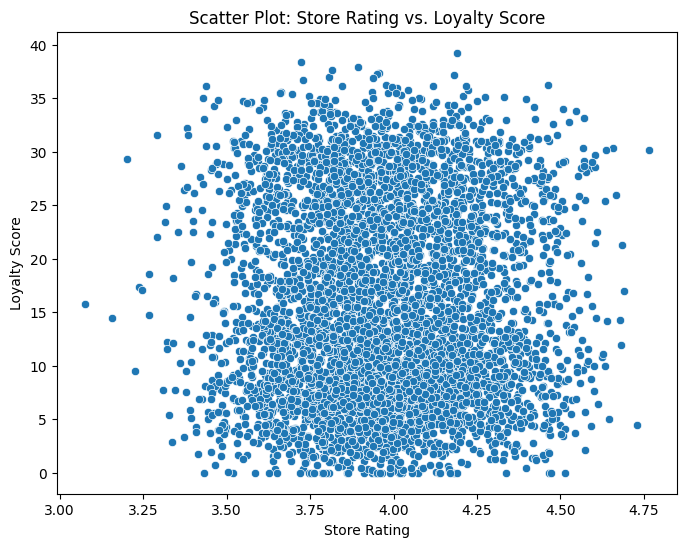

Correlation between Store Rating and Loyalty Score: 0.007266350942762196


In [43]:
# Bivariate Analysis: Store Rating vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Store Rating', y='Loyalty Score', data=df)
plt.title('Scatter Plot: Store Rating vs. Loyalty Score')
plt.xlabel('Store Rating')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Store Rating and Loyalty Score
correlation = df['Store Rating'].corr(df['Loyalty Score'])
print(f"Correlation between Store Rating and Loyalty Score: {correlation}")


**Interpretation:**

* The scatter plot illustrates a **very weak positive correlation** between "Store Rating" and "Loyalty Score."
* Store rating seems to have minimal impact on customer loyalty.
* Other factors likely have a more significant influence on customer loyalty.

### **Membership Status vs. Loyalty Score**

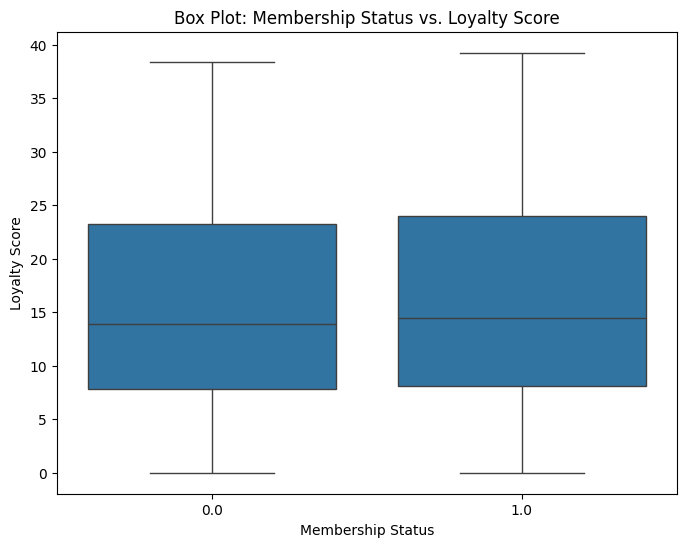


Average Loyalty Score by Membership Status:
 Membership Status
0.0    15.515915
1.0    15.913188
Name: Loyalty Score, dtype: float64


In [44]:
# Bivariate analysis of  Membership Status vs. Loyalty Score

plt.figure(figsize=(8, 6))
sns.boxplot(x='Membership Status', y='Loyalty Score', data=df)
plt.title('Box Plot: Membership Status vs. Loyalty Score')
plt.xlabel('Membership Status')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each membership status group:
average_loyalty_by_membership = df.groupby('Membership Status')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Membership Status:\n", average_loyalty_by_membership)


**Interpretation:**

* While there seems to be a slight tendency for members to have higher loyalty scores, the **relationship is not strong**.
* Other factors likely have a more significant impact on customer loyalty.

### **Gender vs. Loyalty Score**

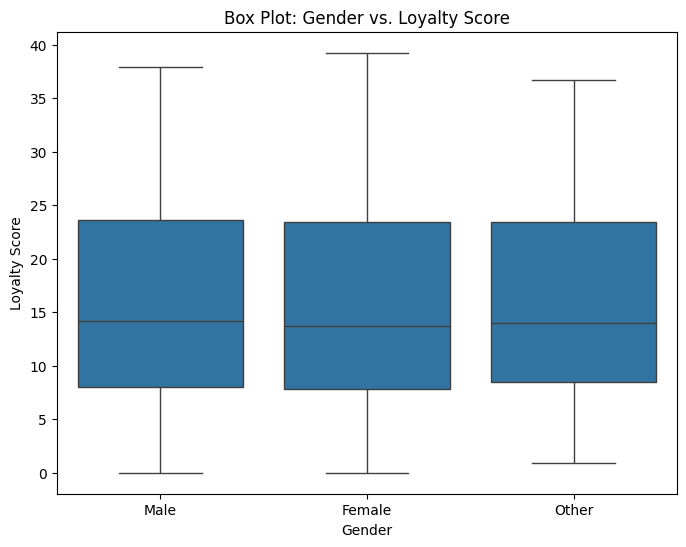


Average Loyalty Score by Gender:
 Gender
Female    15.509923
Male      15.741874
Other     15.918454
Name: Loyalty Score, dtype: float64


In [46]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Loyalty Score', data=df)
plt.title('Box Plot: Gender vs. Loyalty Score')
plt.xlabel('Gender')
plt.ylabel('Loyalty Score')
plt.show()

# average loyalty score for each gender group:
average_loyalty_by_gender = df.groupby('Gender')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Gender:\n", average_loyalty_by_gender)

**Interpretation:**

* There is a **very weak correlation** between gender and loyalt
* Other factors likely have a more significant impact on customer loyalty.

### **Region vs. Loyalty Score**

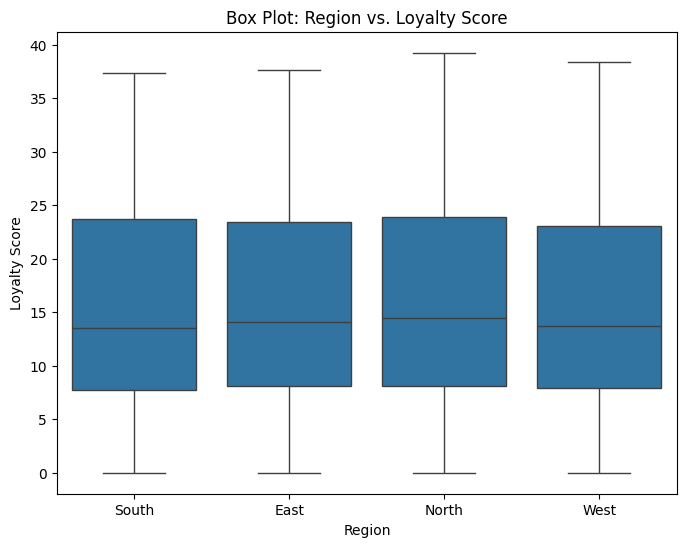


Average Loyalty Score by Region:
 Region
East     15.726079
North    15.910227
South    15.462415
West     15.480349
Name: Loyalty Score, dtype: float64


In [47]:
# Bivariate analysis of 'Region' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Loyalty Score', data=df)
plt.title('Box Plot: Region vs. Loyalty Score')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.show()

#  average loyalty score for each region group:
average_loyalty_by_region = df.groupby('Region')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Region:\n", average_loyalty_by_region)


**Interpretation:**

* There is a **very weak correlation** between region and loyalty.
* The business should focus on other factors that drive customer loyalty, such as product quality, customer service, and personalized experiences.

### **Product Category vs. Loyalty Score**

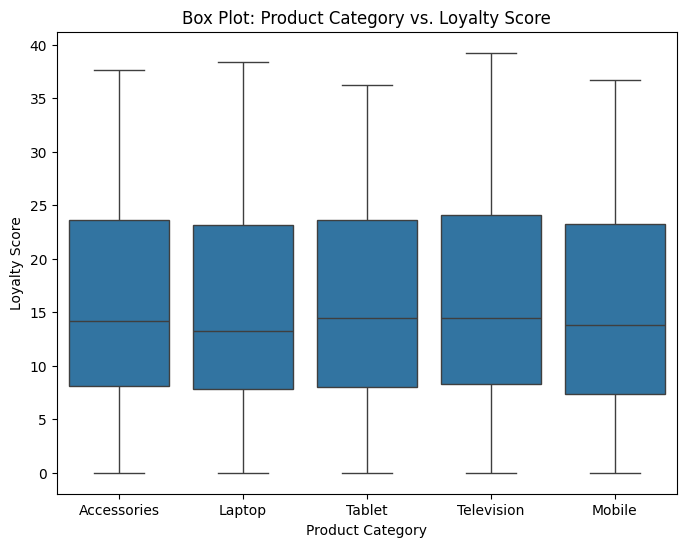


Average Loyalty Score by Product Category:
 Product Category
Accessories    15.810278
Laptop         15.272068
Mobile         15.357037
Tablet         15.787878
Television     15.965189
Name: Loyalty Score, dtype: float64


In [48]:
# Bivariate analysis of 'Product Category' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Category', y='Loyalty Score', data=df)
plt.title('Box Plot: Product Category vs. Loyalty Score')
plt.xlabel('Product Category')
plt.ylabel('Loyalty Score')
plt.show()

# average loyalty score for each product category group:
average_loyalty_by_product_category = df.groupby('Product Category')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Product Category:\n", average_loyalty_by_product_category)


**Interpretation:**

* While there seems to be a slight tendency for the "Television" category to have higher loyalty scores, the **relationship is not strong**.
* Other factors likely have a more significant impact on customer loyalty.

### **Payment Method vs. Loyalty Score**

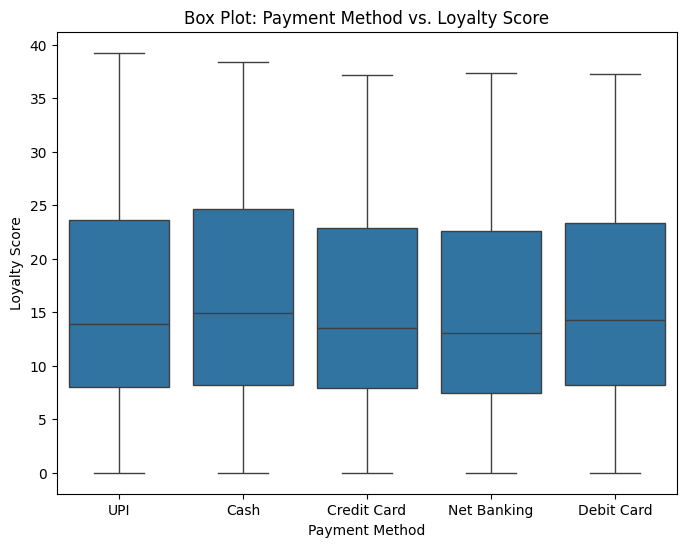


Average Loyalty Score by Payment Method:
 Payment Method
Cash           16.263989
Credit Card    15.287776
Debit Card     15.969283
Net Banking    15.116384
UPI            15.573863
Name: Loyalty Score, dtype: float64


In [49]:
# Bivariate analysis of 'Payment Method' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Payment Method', y='Loyalty Score', data=df)
plt.title('Box Plot: Payment Method vs. Loyalty Score')
plt.xlabel('Payment Method')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each payment method group:
average_loyalty_by_payment_method = df.groupby('Payment Method')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Payment Method:\n", average_loyalty_by_payment_method)

**Interpretation:**

* While there seems to be a slight tendency for the "Cash" payment method to have higher loyalty scores, the **relationship is not strong**
* Other factors likely have a more significant impact on customer loyalty.

### **Referred Visit Time vs. Loyalty Score**

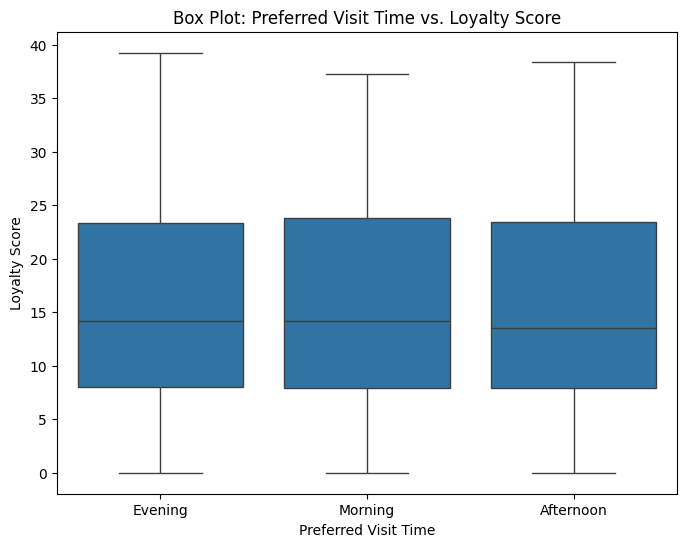


Average Loyalty Score by Preferred Visit Time:
 Preferred Visit Time
Afternoon    15.446478
Evening      15.663907
Morning      15.802463
Name: Loyalty Score, dtype: float64


In [50]:
# Bivariate analysis of 'Preferred Visit Time' vs. 'Loyalty Score'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Preferred Visit Time', y='Loyalty Score', data=df)
plt.title('Box Plot: Preferred Visit Time vs. Loyalty Score')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Loyalty Score')
plt.show()

# You can also calculate the average loyalty score for each preferred visit time group:
average_loyalty_by_visit_time = df.groupby('Preferred Visit Time')['Loyalty Score'].mean()
print("\nAverage Loyalty Score by Preferred Visit Time:\n", average_loyalty_by_visit_time)


**Interpretation:**

* There is a **very weak correlation** between preferred visit time and loyalty
* Other factors likely have a more significant impact on customer loyalty.

## **Multivariate Analysis**

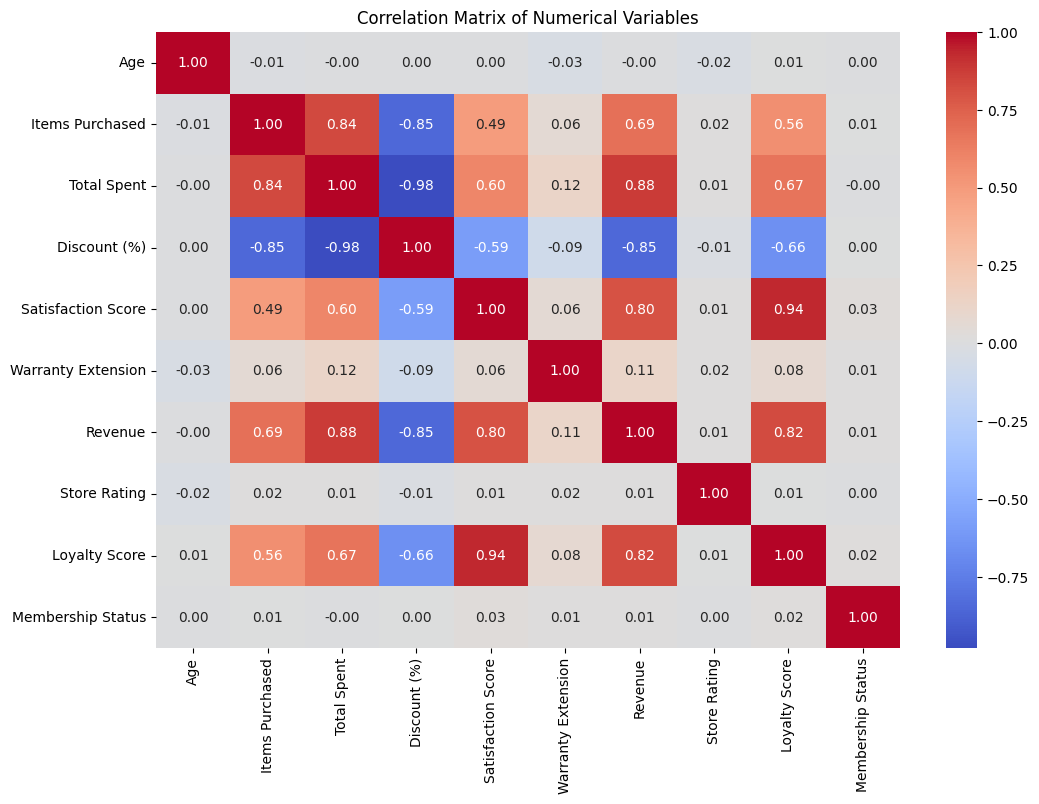

In [55]:
# numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])  # Selects columns with numerical data types

# correlation matrix using the numerical DataFrame
correlation_matrix = numerical_df.corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Strong Positive Correlation between:**

* Items Purchased and Total Spent
* Satisfaction Score and Loyalty Score
* Revenue and Total Spent

**Strong Negative Correlations:**

* Discount (%) and Total Spent
* Discount (%) and Revenue
* Store Rating and Membership Status

**Other Observations:**

Age and Warranty Extension has a relatively weak correlation with other variables, indicating that they might not be a strong driver of customer behavior.



## **Robust Scaler**

In [17]:
from sklearn.preprocessing import RobustScaler

features_to_scale = ['Age', 'Items Purchased', 'Total Spent', 'Discount (%)', 'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating']

# Creates a RobustScaler object
scaler = RobustScaler()

# Fit and transform the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())

    Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0  0.52        -0.857143    -0.846922      0.846922           -0.427852   
1  1.04         0.428571     0.874848     -0.874848            0.454224   
2  0.12        -0.428571    -0.413011      0.413011           -0.181395   
3 -0.44         0.285714     0.864190     -0.864190           -0.131675   
4  0.68         0.857143     1.702394     -1.006353            0.499803   

   Warranty Extension   Revenue  Store Rating  
0                 1.0 -0.262024     -0.883471  
1                 1.0  1.251772     -1.194573  
2                 1.0 -0.334189     -0.133969  
3                 0.0  0.502499     -0.312269  
4                 0.0  2.255473     -0.448246  
